In [ ]:
#import numpy as np
import pandas as pd

import matplotlib.pylab as plt
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure

import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("/content/jrc-efas-hydropower-inflow.csv")
df.sample(5)

,year,week,country_iso2,inflow_mwh
21988,2007,17,IT,1.014571e+06
24197,1991,38,LV,3.663652e+04
40601,2016,41,SK,6.619941e+04
21031,2017,49,IE,2.679950e+04
23463,2006,35,LT,1.849483e+04


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40770 entries, 0 to 40769
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          40770 non-null  int64  
 1   week          40770 non-null  int64  
 2   country_iso2  40770 non-null  object 
 3   inflow_mwh    40770 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 1.2+ MB


In [ ]:
df.describe()

,year,week,inflow_mwh
count,40770.000000,40770.000000,4.077000e+04
mean,2005.015232,26.566887,3.725253e+05
std,8.369499,15.068434,7.026515e+05
min,1991.000000,1.000000,0.000000e+00
25%,1998.000000,14.000000,3.938015e+04
50%,2005.000000,27.000000,9.752532e+04
75%,2012.000000,40.000000,4.436249e+05
max,2019.000000,53.000000,9.807582e+06


In [ ]:
df.columns = ['Year' , 'Week' , 'Code' , 'Inflow_mwh']
df.head()

,Year,Week,Code,Inflow_mwh
0,1991,1,AT,565228.151724
1,1991,2,AT,520088.013873
2,1991,3,AT,423447.978518
3,1991,4,AT,384373.117697
4,1991,5,AT,365003.716125


In [ ]:
df['Code'].unique()

array(['AT', 'BA', 'BE', 'BG', 'CH', 'CZ', 'DE', 'ES', 'FI', 'FR', 'GB',
       'GR', 'HU', 'IE', 'IT', 'LT', 'LV', 'ME', 'MK', 'NO', 'PL', 'PT',
       'RO', 'RS', 'SE', 'SI', 'SK'], dtype=object)

In [ ]:
df_no=df[df['Code']=='NO']
df_no

,Year,Week,Code,Inflow_mwh
28690,1991,1,NO,1.412222e+06
28691,1991,2,NO,1.314405e+06
28692,1991,3,NO,1.496726e+06
28693,1991,4,NO,1.332034e+06
28694,1991,5,NO,1.167398e+06
...,...,...,...,...
30195,2019,48,NO,1.514921e+06
30196,2019,49,NO,1.576925e+06
30197,2019,50,NO,1.395448e+06
30198,2019,51,NO,1.327099e+06


In [ ]:
df_no['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Week'].astype(str) + '-1', format='%G-%V-%w') + pd.DateOffset(days=7)
df_no

,Year,Week,Code,Inflow_mwh,Date
28690,1991,1,NO,1.412222e+06,1991-01-07
28691,1991,2,NO,1.314405e+06,1991-01-14
28692,1991,3,NO,1.496726e+06,1991-01-21
28693,1991,4,NO,1.332034e+06,1991-01-28
28694,1991,5,NO,1.167398e+06,1991-02-04
...,...,...,...,...,...
30195,2019,48,NO,1.514921e+06,2019-12-02
30196,2019,49,NO,1.576925e+06,2019-12-09
30197,2019,50,NO,1.395448e+06,2019-12-16
30198,2019,51,NO,1.327099e+06,2019-12-23


In [ ]:
df_no = df_no.drop(columns=['Code','Year','Week'])
df_no

,Inflow_mwh,Date
28690,1.412222e+06,1991-01-07
28691,1.314405e+06,1991-01-14
28692,1.496726e+06,1991-01-21
28693,1.332034e+06,1991-01-28
28694,1.167398e+06,1991-02-04
...,...,...
30195,1.514921e+06,2019-12-02
30196,1.576925e+06,2019-12-09
30197,1.395448e+06,2019-12-16
30198,1.327099e+06,2019-12-23


In [ ]:
df_no

,Inflow_mwh,Date
28690,1.412222e+06,1991-01-07
28691,1.314405e+06,1991-01-14
28692,1.496726e+06,1991-01-21
28693,1.332034e+06,1991-01-28
28694,1.167398e+06,1991-02-04
...,...,...
30195,1.514921e+06,2019-12-02
30196,1.576925e+06,2019-12-09
30197,1.395448e+06,2019-12-16
30198,1.327099e+06,2019-12-23


<Axes: xlabel='Date', ylabel='Inflow_mwh'>

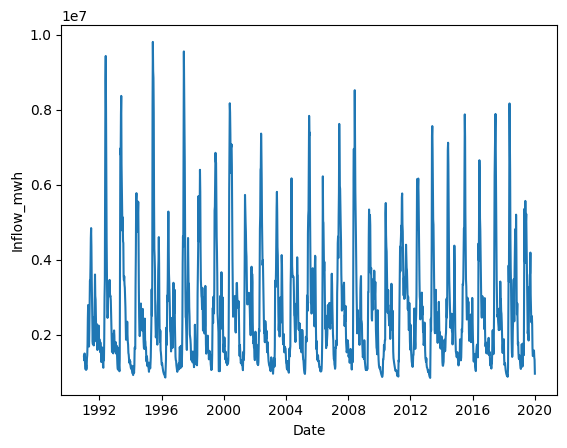

In [ ]:
sns.lineplot(data=df_no, x='Date', y = 'Inflow_mwh')

In [ ]:
#plt.figure(figsize=(20,10))
#plt.plot(df['Year'],df['Solar Capacity'])

In [ ]:
df_no.columns= ['y','ds']
df_no

,y,ds
28690,1.412222e+06,1991-01-07
28691,1.314405e+06,1991-01-14
28692,1.496726e+06,1991-01-21
28693,1.332034e+06,1991-01-28
28694,1.167398e+06,1991-02-04
...,...,...
30195,1.514921e+06,2019-12-02
30196,1.576925e+06,2019-12-09
30197,1.395448e+06,2019-12-16
30198,1.327099e+06,2019-12-23


## Model Training & Building

In [ ]:
#conda install -c conda-forge prophet
!pip install prophet
# or # !pip install fbprophet

In [ ]:
from prophet import Prophet

In [ ]:
m = Prophet()
m.fit(df_no)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoie2pvto/kt50f1ij.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoie2pvto/9y89tdyu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84273', 'data', 'file=/tmp/tmpoie2pvto/kt50f1ij.json', 'init=/tmp/tmpoie2pvto/9y89tdyu.json', 'output', 'file=/tmp/tmpoie2pvto/prophet_model4dhvrp81/prophet_model-20240701151812.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:18:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:18:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
#periods = 5 * 365
#future = m.make_future_dataframe(periods=5, freq='Y')
#future

future_years = 5
future_days = future_years * 365
future = m.make_future_dataframe(periods=future_days)
future.tail()

,ds
3325,2024-12-24
3326,2024-12-25
3327,2024-12-26
3328,2024-12-27
3329,2024-12-28


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
3325,2024-12-24,1.559383e+06,439826.193874,2.623407e+06
3326,2024-12-25,1.545519e+06,377059.740521,2.601994e+06
3327,2024-12-26,1.532188e+06,455160.938476,2.669572e+06
3328,2024-12-27,1.519464e+06,401305.891861,2.604070e+06
3329,2024-12-28,1.507404e+06,434999.024231,2.675954e+06


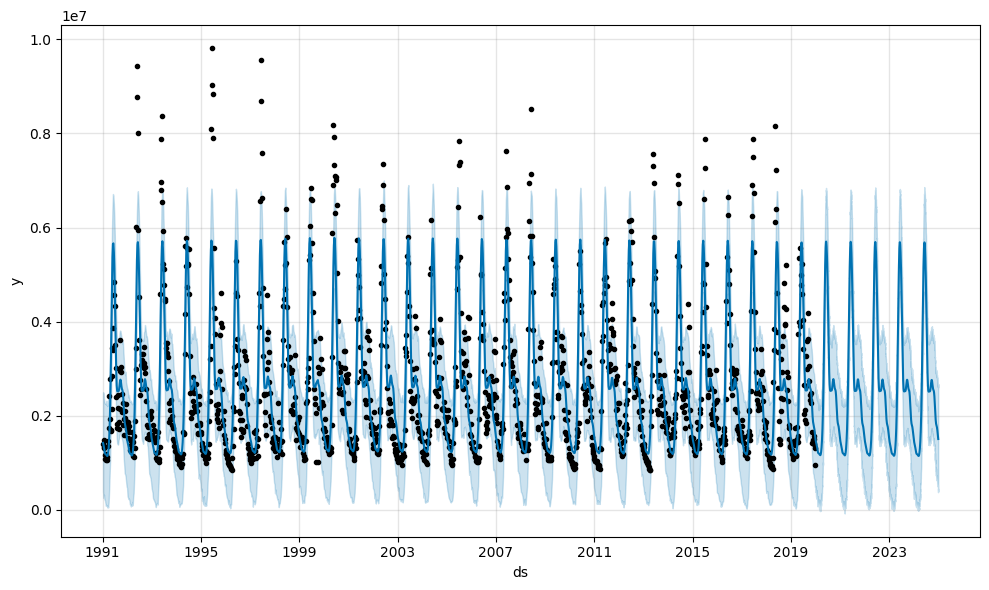

In [ ]:
fig1 = m.plot(forecast)

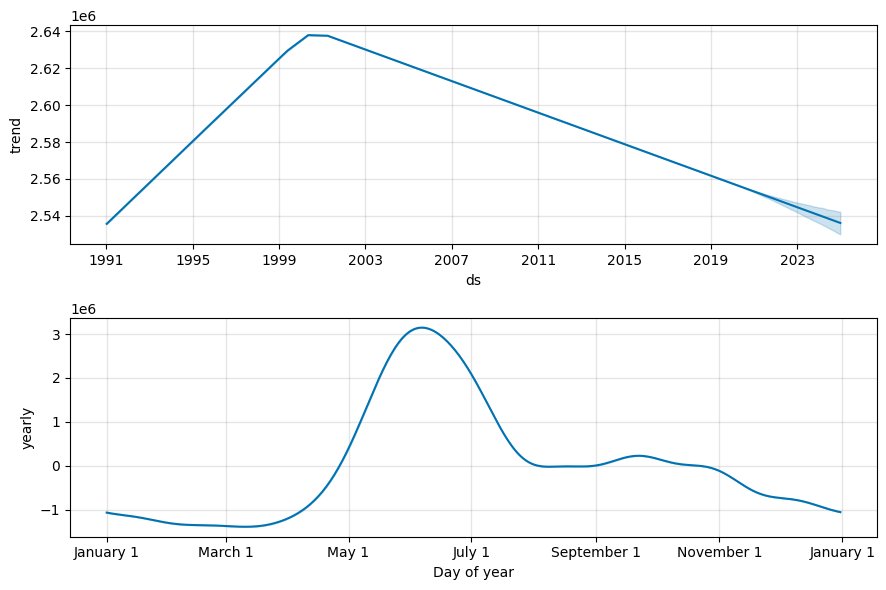

In [ ]:
fig2 = m.plot_components(forecast)



In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)


In [ ]:
plot_components_plotly(m, forecast)


In [ ]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

data = {
    'ds': pd.date_range(start='1990-01-01', periods=29, freq='Y'),
    'y': [
        1.187e8, 1.343e8, 1.451e8, 1.418e8, 1.536e8, 1.222e8, 1.272e8,
        1.451e8, 1.339e8, 1.2e8, 1.685e8, 1.381e8, 1.302e8, 1.26e8,
        1.183e8, 1.396e8, 1.311e8, 1.191e8, 1.308e8, 1.394e8, 1.647e8,
        1.364e8, 1.334e8, 1.266e8, 1.362e8, 1.31e8, 1.378e8, 1.448e8,
        1.341e8
    ]
}

df = pd.DataFrame(data)

train_end = '2014-12-31'
df_train = df[df['ds'] <= train_end]
df_test = df[df['ds'] > train_end]

m = Prophet()
m.fit(df_train)

future = m.make_future_dataframe(periods=len(df_test), freq='Y')
forecast = m.predict(future)
forecast_test = forecast[forecast['ds'] > train_end]

y_true = df_test['y'].values
y_pred = forecast_test['yhat'].values

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")

future_years = 5
future_days = future_years * 365
future = m.make_future_dataframe(periods=future_days)
forecast = m.predict(future)

fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 19.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoie2pvto/dkgzk933.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoie2pvto/9dvwpkrp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96337', 'data', 'file=/tmp/tmpoie2pvto/dkgzk933.json', 'init=/tmp/tmpoie2pvto/9dvwpkrp.json', 'output', 'file=/tmp/tmpoie2pvto/prophet_model07vp9bu1/prophet_model-20240701151817.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
15:18:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:18:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:

Mean Absolute Error (MAE): 2572479.402330838
Mean Squared Error (MSE): 14722721937004.965
Root Mean Squared Error (RMSE): 3837019.929190486
Mean Absolute Percentage Error (MAPE): 1.8228103390893764%
